# Getting input from the serial ports using tkinter
First you need to make sure that pyserial and tkinter are installed on your system. If you are using Anaconda, then tkinter is probably already installed. On my mac (Ventura) I followed the approach below, opening a terminal window and running pip to install the libraries. We did the same thing on a Windows 10 machine with the same success, although the tkinter install may look like it failed. To open a terminal window, go to the Jupyter file browser and choose New/Terminal

pip install pyserial

pip install tk


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import datetime

import serial
import serial.tools.list_ports

import tkinter as tk
import tkinter.scrolledtext as scrolledtext
import tkinter.filedialog as filedialog

# Make a tkinter window
window = tk.Tk()
window.title("Rick's Serial Viewer / Recorder")
window.geometry("800x800")

# with two scrolling text boxes
devList = scrolledtext.ScrolledText(window, highlightbackground = "orange", 
                                    highlightthickness = 2, 
                                    width = 60, height = 10)
devList.grid(row = 0, columnspan = 3,pady = 10,padx = 10)

serText = scrolledtext.ScrolledText(window, highlightbackground = "blue", 
                                    highlightthickness = 2, 
                                    width = 100, height = 40)
serText.grid(row = 1, columnspan = 4,padx = 10)

# and a frame with a dropdown and some buttons arranged on a grid
frame1 = tk.Frame(window)
tk.Label(frame1, text= "Select Serial Device Name:").grid(row = 0,column = 0, sticky = 'W')
devName = tk.StringVar()
devName.set("Choose a Serial Device")
devOption = tk.OptionMenu(frame1,devName,"Choose a Serial Device")
devOption.grid(row = 1, column = 0, columnspan = 2, sticky = 'W')
saveAsButton = tk.Button(frame1, text="Save Output As...")
saveAsButton.grid(row = 2, column=1)
startButton = tk.Button(frame1, text="Start Recording")
startButton.grid(row = 2, column=0)
clearButton = tk.Button(frame1, text="Clear the Output")
clearButton.grid(row = 3, column = 1)
frame1.grid(row = 0, column = 3)

ser = 0    # the serial port handle to read from if one is open, otherwise 0

def startLog(event):   # when the start logging button is pressed
    global ser
    if(startButton['text'] == "Start Recording"):
        print("starting recording")
        try:
            # set serial port to time out quickly because we will keep coming back
            ser = serial.Serial(devName.get(),115200,timeout=0.03)
        except:
            ser = 0
            tk.messagebox.showerror("Opening Error", "Error opening serial device:"+
                                    "\nConnect and choose a valid device")
        else:
            startButton.config(text = "Stop Recording")
    else:
        print("stopping recording")
        startButton.config(text = "Start Recording")
        try:   
            ser.close()
        except:   # I don't think this will ever happen
            tk.messagebox.showerror("Closing Error", "Error closing serial device")
        ser = 0
    
startButton.bind("<Button-1>", startLog)

def saveAs(event):   #when hitting the save as button
    file = tk.filedialog.asksaveasfile(mode='w')
    if(file):
        print("writing file...")
        file.write(serText.get("1.0",tk.END))
        file.close

saveAsButton.bind("<Button-1>", saveAs)

a = []                 # a place to save the data for later
def clearLog(event):   # when hitting the clear the output button
    global a
    a = []
    serText.delete("1.0",tk.END)

clearButton.bind("<Button-1>", clearLog)

def pollSerial():   # check for new lines on the serial port
    if(ser != 0):
        line = ser.readline().decode("utf-8")  # decode turns bytes into a string
        line = line.strip()                    # strip to remove potential \r\n double termination
        if(line != ""):                        # timeout will return a null line
            a.append(line.split(','))          # add a row of values to a[], split at commas
            serText.insert(tk.END,line)        # add the line to the displayed text
            serText.insert(tk.END,'\n')        # add single \n to terminate line
            serText.yview_moveto(1.0)          # keep the focus at the end of the text
            window.after(1,pollSerial)         # return very often for more serial data if there was no timeout
        else:
            window.after(50,pollSerial)        # return often for more serial data if timed out
    else:                                      # return too often and the app locks in timeouts for slow data
        window.after(250,pollSerial)           # return less often for more serial data if not connected
    
pollSerial()   # start it running repeatedly

def refreshPorts():
    # Show a list of existing serial ports so you can decide what to open
    ports = list(serial.tools.list_ports.comports())
    devOption['menu'].delete(0,'end')    # remove all the old options from the optionmenu
    devList.delete("1.0",tk.END)         # empty out the displayed list
    devList.insert(tk.END,"System returns this list of Serial Devices:\n\n")
    maxwidth = 23                        # track the largest menu option text width >20
    for p in ports:
        s = str(p).split()[0]            # put only the first token in the menu
        devOption['menu'].add_command(label=s, command=tk._setit(devName, s))
        maxwidth = max(maxwidth,len(s))
        devList.insert(tk.END,p)         # add the complete port line with descriptors to the list
        devList.insert(tk.END,'\n')      # with a new line
    devOption.config(width = maxwidth)   # make sure the menu is wide enough
    window.after(500,refreshPorts)       #repeat again later, but not too often   
        
refreshPorts()   # start it running repeatedly

window.mainloop()


1   HIToolbox                           0x00007ff80d6b3726 _ZN15MenuBarInstance22EnsureAutoShowObserverEv + 102
2   HIToolbox                           0x00007ff80d6b32b8 _ZN15MenuBarInstance14EnableAutoShowEv + 52
3   HIToolbox                           0x00007ff80d657908 SetMenuBarObscured + 408
4   HIToolbox                           0x00007ff80d6574ca _ZN13HIApplication15HandleActivatedEP14OpaqueEventRefhP15OpaqueWindowPtrh + 164
5   HIToolbox                           0x00007ff80d651996 _ZN13HIApplication13EventObserverEjP14OpaqueEventRefPv + 252
6   HIToolbox                           0x00007ff80d619bd2 _NotifyEventLoopObservers + 153
7   HIToolbox                           0x00007ff80d6513e6 AcquireEventFromQueue + 494
8   HIToolbox                           0x00007ff80d6403ec ReceiveNextEventCommon + 285
9   HIToolbox                           0x00007ff80d6402b3 _BlockUntilNextEventMatchingListInModeWithFilter + 70
10  AppKit                              0x00007ff8068392f3 _DPS

starting recording
stopping recording


2023-04-25 17:34:37.983 python[67792:3203022] +[CATransaction synchronize] called within transaction


## Close the tkinter Window

The tkinter cell above will keep running until you close the window it created. You won't be able to run the next cell until it finishes.

## Plot the Results

a[ ] is an array of all the lines recorded since the last clearing of the output, split at commas into string tokens. If all of those tokens are string representations of numbers, it will be very easy to convert them to a floating point array and draw some graphs.

```
#include "RTClib.h"

void setup() {
  // put your setup code here, to run once:

}

void loop() {
  // put your main code here, to run repeatedly:
  Serial.printf("%10.3f, %6.3f, %6.3f, %6.3f\n", millis()/1000., 120 * sin(millis()/100.), 140 * sin(millis()/200.), 160 * sin(millis()/300.));
  delay(50);
}
```

This arduino code will generate some data if you want to test

 ['79.243', ' 81.678', ' 51.190', ' 39.515'] 
 ['79.294', ' 114.201', ' 82.969', ' 65.663'] 
 ['79.346', ' 117.417', ' 108.731', ' 89.843'] 


[[ 79.243  81.678  51.19   39.515]
 [ 79.294 114.201  82.969  65.663]
 [ 79.346 117.417 108.731  89.843]]


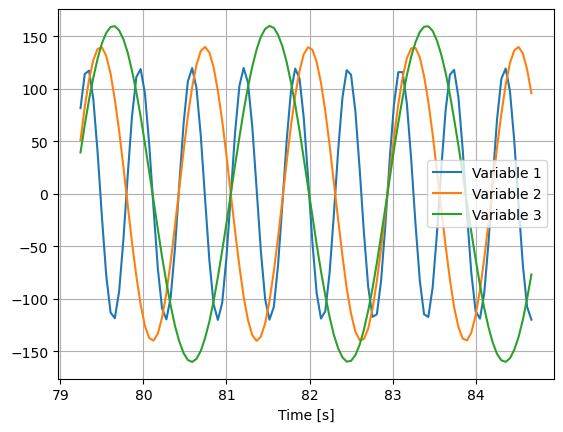

In [5]:
print('',a[0],'\n',a[1],'\n',a[2],"\n\n")      # a should be full of string tokens
x = np.asfarray(a)                             # convert a[] into an np.array of floats
print(x[:3,:])                                 # print a few lines to be sure it worked  
# You need to specify the labels to match your data by changing these strings.
# Make sure there are enough for all the columns in your data.
labels = ["Time [s]", "Variable 1", "Variable 2", "Variable 3", "Variable 4", 
          "Variable 5", "Variable 6", "Variable 7", "Variable 8"]
for col in range(1,x.shape[1]):                # for each of the columns after the first
    plt.plot(x[:,0],x[:,col], label = labels[col])
plt.xlabel(labels[0])
plt.grid()
plt.legend()